In [178]:
#All modules and Libraries
from matplotlib import pyplot
import numpy
import pandas
import seaborn

COL = "#b2beb5"

In [179]:
# read csv files
df = pandas.read_csv(r"C:\Users\DELL\Downloads\HR_Dataset\cleaned_HR_data.csv")

In [180]:
# determine the total number of rows and columns
df.shape

(833, 12)

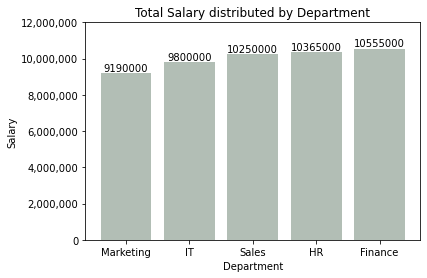

In [281]:
#Salary Distribution by department
salaryDistribution = df.groupby("Department")["Salary"].sum().sort_values()
x = salaryDistribution.index
y = salaryDistribution.values

pyplot.bar(x,y,color=COL)
pyplot.title("Total Salary distributed by Department")
pyplot.xlabel(x.name)
pyplot.ylabel("Salary")
pyplot.ylim(0, max(y)*1.1)

ticks = list(range(0, int(max(y)) + 2000000, 2000000))
pyplot.yticks(ticks, [f"{tick:,}" for tick in ticks])
for h,v in enumerate(salaryDistribution):
    pyplot.text(h,v,str(v),ha="center", va="bottom")
    
pyplot.show()



<AxesSubplot:xlabel='Performance Score', ylabel='Department'>

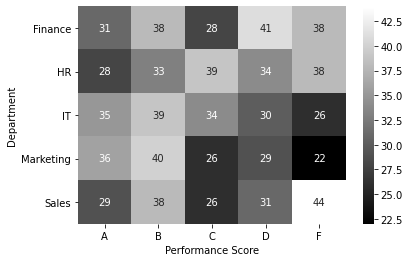

In [200]:
#Grade Distribution by Department
unstacked = df.groupby(["Department", "Performance Score"]).size().unstack(fill_value=0)
seaborn.heatmap(unstacked, annot=True, cmap="gray")


In [83]:
grade_map = {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'F':1}
df["grade_num"] = df["grade"].map(grade_map)


range(0, 5, 2)


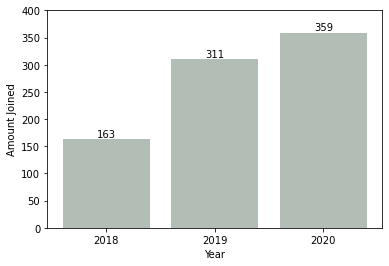

In [232]:
#Year with the most recruiment
yearGroup = df.groupby("Year").size().sort_values()

pyplot.bar(yearGroup.index.astype(str), yearGroup.values, color=COL)
pyplot.yticks(range(0, max(yearGroup.values) + 50, 50))
pyplot.xlabel("Year")
pyplot.ylabel("Amount Joined")

for h,v in enumerate(yearGroup):
    pyplot.text(h,v,str(v), ha="center", va="bottom")

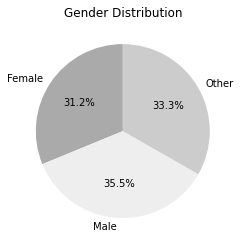

In [276]:
#Gender Distribution
genderDist = df.groupby("Gender").size()
pyplot.pie(
    genderDist.values, 
    labels=genderDist.index, 
    colors=['#aaa','#eee','#ccc'],
    startangle=90,
    autopct='%1.1f%%',
          )
pyplot.title("Gender Distribution")
pyplot.show()

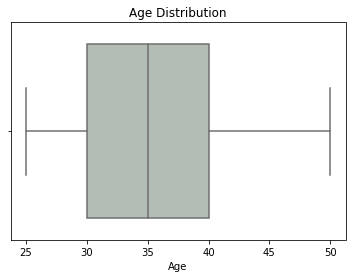

In [277]:
#Check age Distribution using boxplot
seaborn.boxplot(
    x=df["Age"],
    color = COL,
    )
pyplot.title("Age Distribution")
pyplot.xlabel("Age")
pyplot.show()